## Customer Segmentation Using K - means 
#### About: 
Customer Segmentation is a popular application of unsupervised learning. Using clustering, identify segments of customers to target the potential user base. They divide customers into groups according to common characteristics like gender, age, interests, and spending habits so they can market to each group effectively.
#### Motivation for the Project: 
- To achieve customer segmentation using machine learning algorithm (KMeans Clustering) in Python and to know how this project can be used in marketing strategy in real world.
- To know who are our target customers with whom you can start marketing strategy.

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('Customers-segmentation-dataset.csv')

About this file - This file contains the basic information (ID, age, gender, income, spending score) about the customers

In [4]:
# printing its head values
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


There are 5 columns CustomerID, Gender, Age, Annual Income and Spending Score in our dataframe 'customer_data'

In [5]:
# finding the number of rows and column
customer_data.shape

(200, 5)

In [6]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#Getting summary of our dataframe
customer_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
# applying grid to all our plots for better visuals
sns.set(style="whitegrid")

### Visualizing various Distributions using Graph plots

#### Visualizing 'Age'

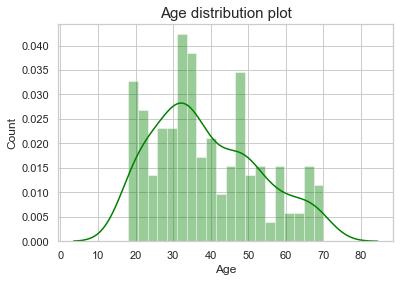

In [11]:
# distribution plot for 'Age'
sns.distplot(customer_data['Age'],color= 'green',bins=20)
plt.title('Age distribution plot', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

This shows that our data has customer ranges from 10 years to 80 years.

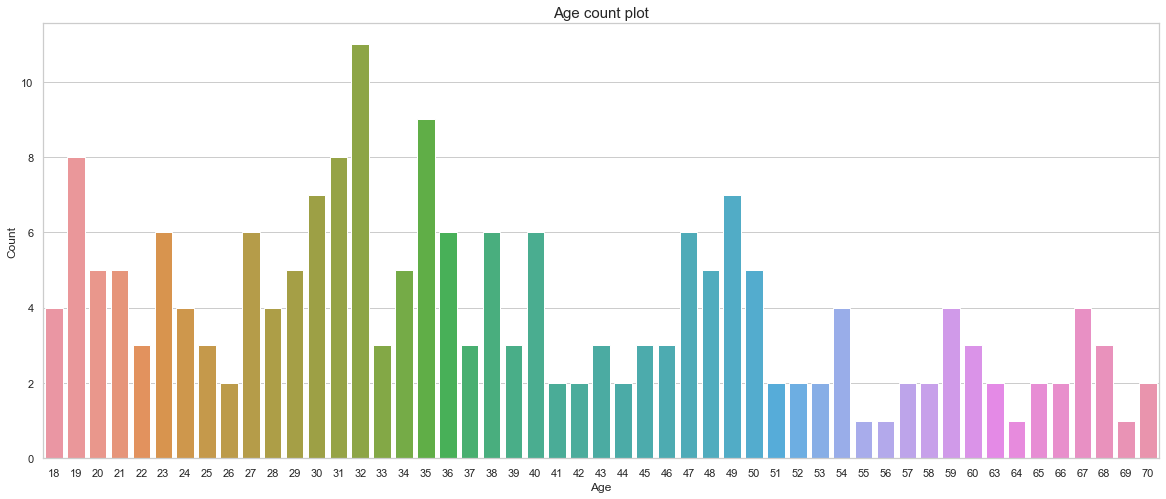

In [12]:
# count plot for 'Age'
plt.figure(figsize=(20,8))
sns.countplot(customer_data['Age'])
plt.title('Age count plot', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

This plot is more clear view on counting customer based on their Age. Also we can see that 11 customers are 32 years old which is the most value count.

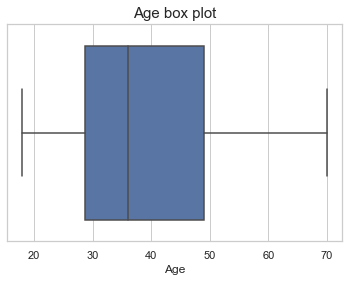

In [13]:
# box plot for 'Age'
sns.boxplot(customer_data['Age'])
plt.title('Age box plot', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.show()

Based on summary (describe) we can get a clear picture of various aspect of customer based on their age.

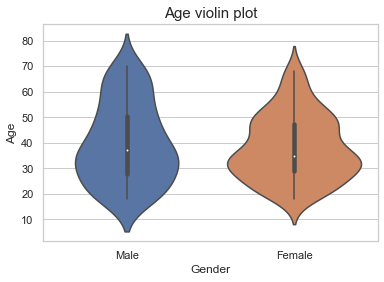

In [16]:
# violin plot for 'Age'
sns.violinplot(y = 'Age' , x = 'Gender' , data = customer_data)
plt.title('Age violin plot', fontsize = 15)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Age', fontsize = 12)
plt.show()

This violin plot shows that we have higher number of female customer who belongs to age group of nearly 30 years.

#### Visualizing 'Annual Income'

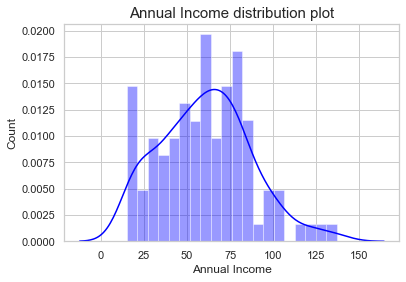

In [17]:
# distribution plot for 'Annual Income'
sns.distplot(customer_data['Annual Income (k$)'],color= 'blue',bins=20)
plt.title('Annual Income distribution plot', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

This shows that our data has customer ranges from income of 0k to 150k.

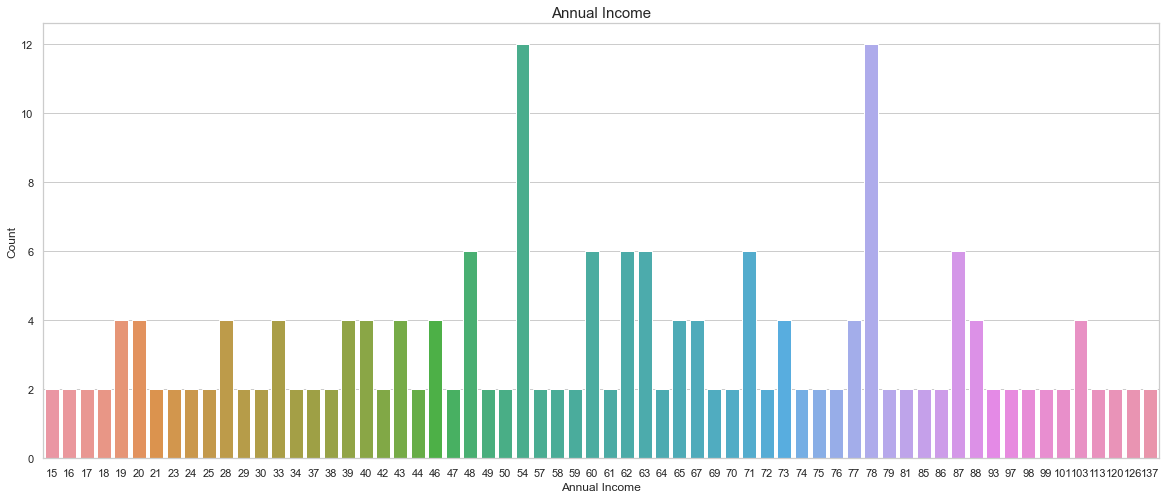

In [18]:
# count plot for 'Annual Income'
plt.figure(figsize= (20,8))
sns.countplot(customer_data['Annual Income (k$)'])
plt.title('Annual Income', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

This plot is more clear view on counting customer based on their Income. Also we can see that 12-12 customers are 54 years and 78 years old which is the most value count.

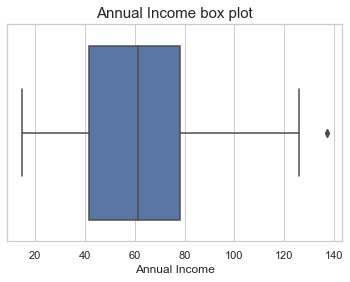

In [19]:
# box plot for 'Annual Income'
sns.boxplot(customer_data['Annual Income (k$)'])
plt.title('Annual Income box plot', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.show()

Based on describe summary we can get a clear picture of various aspect of customer based on their income.

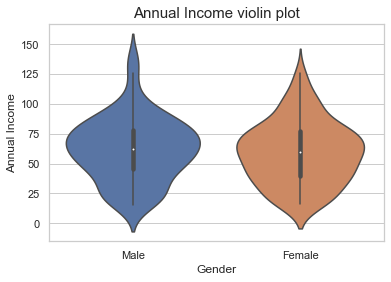

In [20]:
# violin plot for 'Annual Income'
sns.violinplot(y = 'Annual Income (k$)' , x = 'Gender' , data = customer_data)
plt.title('Annual Income violin plot', fontsize = 15)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Annual Income', fontsize = 12)
plt.show()

This violin plot shows that we have higher number of male customer who have more income.

#### Visualizing 'Spending Scores'

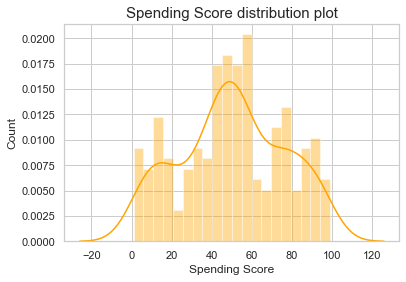

In [21]:
# distribution plot for 'Spending Score'
sns.distplot(customer_data['Spending Score (1-100)'],color= 'orange',bins=20)
plt.title('Spending Score distribution plot', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

This shows that our data has customer ranges from with -20 to 120 spending score.

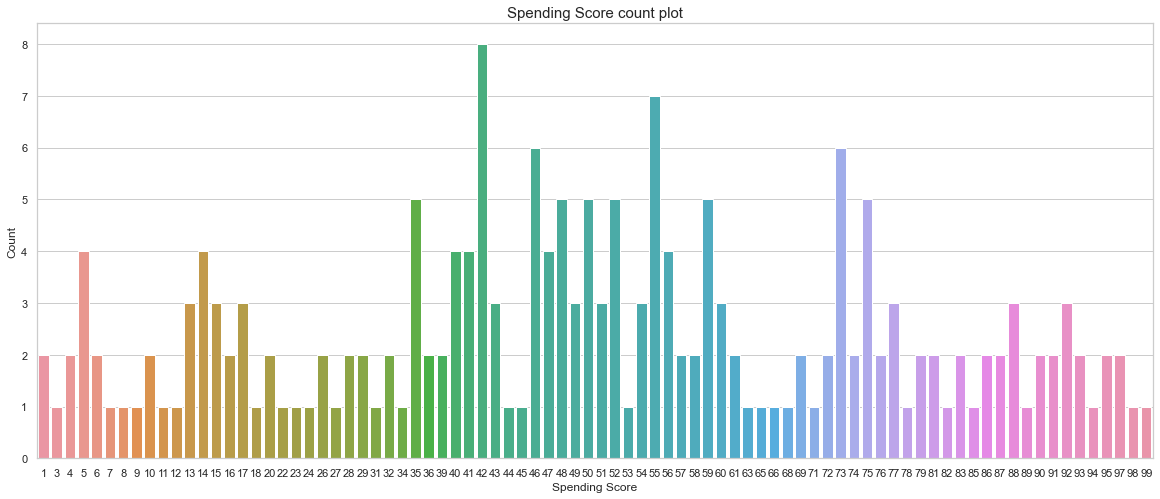

In [22]:
# count plot for 'Spending Score'
plt.figure(figsize=(20,8))
sns.countplot(customer_data['Spending Score (1-100)'])
plt.title('Spending Score count plot', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

This plot is more clear view on counting customer based on their Age. Also we can see that 8 customers are 42 years old which is most value count.

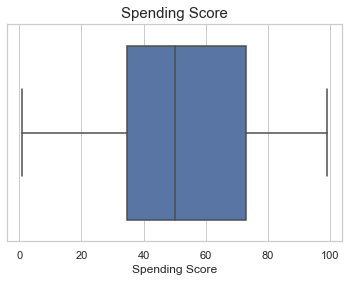

In [23]:
# box plot for 'Spending Score'
sns.boxplot(customer_data['Spending Score (1-100)'])
plt.title('Spending Score', fontsize = 15)
plt.xlabel('Spending Score', fontsize = 12)
plt.show()

Based on 5 point summary we can get a clear picture of various aspect of customer based on their spending score.

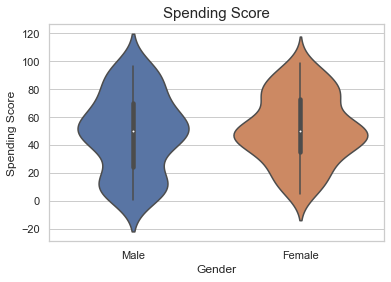

In [24]:
# violin plot for 'Spending Score'
sns.violinplot(y = 'Spending Score (1-100)' , x = 'Gender' , data = customer_data)
plt.title('Spending Score', fontsize = 15)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.show()

This violin plot shows that we have higher number of female customer who have mostly spending score around 50.

#### Visualizing 'Gender'

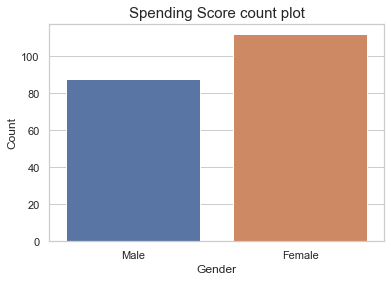

In [25]:
# count plot for 'Gender'
sns.countplot(x='Gender', data=customer_data)
plt.title('Spending Score count plot', fontsize = 15)
plt.xlabel('Gender', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

This plot clearly shows that we have more female customer compare to male customers.

#### Correlation between various Attributes

<AxesSubplot:>

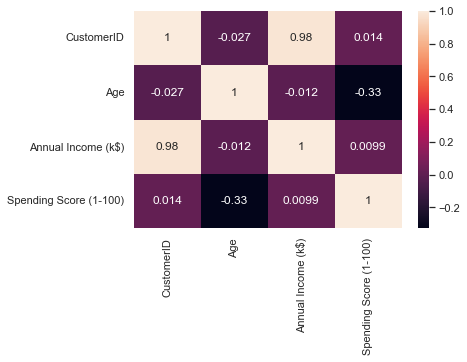

In [26]:
# heatmap to show correlation of various Attributes
sns.heatmap(customer_data.corr(), annot = True)

From this plot we got that income and spending score correlates to each other with a good score. But age and spending score does not correlates efficiently.

## Choosing the Annual Income Column & Spending Score column for visualization (Cluster based on Annual Income and Spending Score)

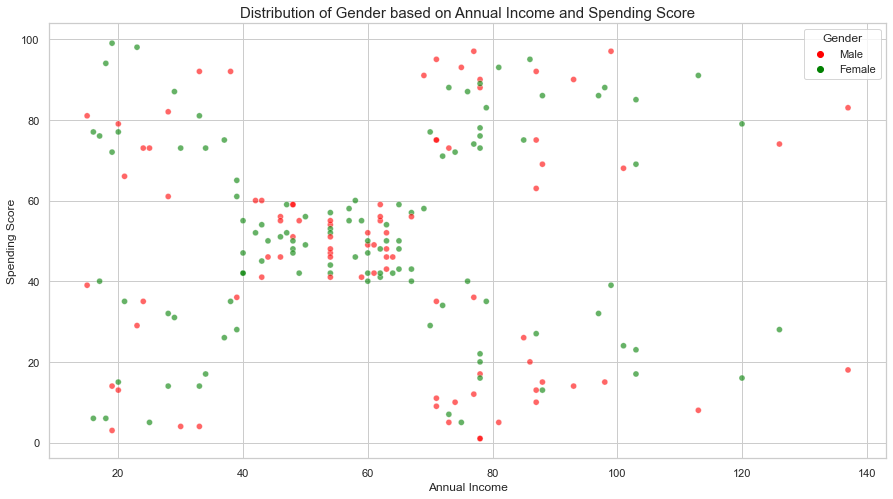

In [27]:
# Distribution of Gender based on Annual Income and Spending Scores
plt.figure(figsize=(15,8))
sns.scatterplot(customer_data['Annual Income (k$)'], customer_data['Spending Score (1-100)'],hue=customer_data['Gender'],
                palette= ['red','green'] ,alpha=0.6)
plt.title('Distribution of Gender based on Annual Income and Spending Score', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.show()

This scatter plot show the distribution of customers based on their income, spending score and gender. And we can see customer cluster clearlly in this plot.

- #### Choosing the number of clusters

    - WCSS -> Within Clusters Sum of Squares

In [28]:
# finding wcss value for different number of clusters
Income_Spend = customer_data[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(Income_Spend)
    wcss.append(km.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


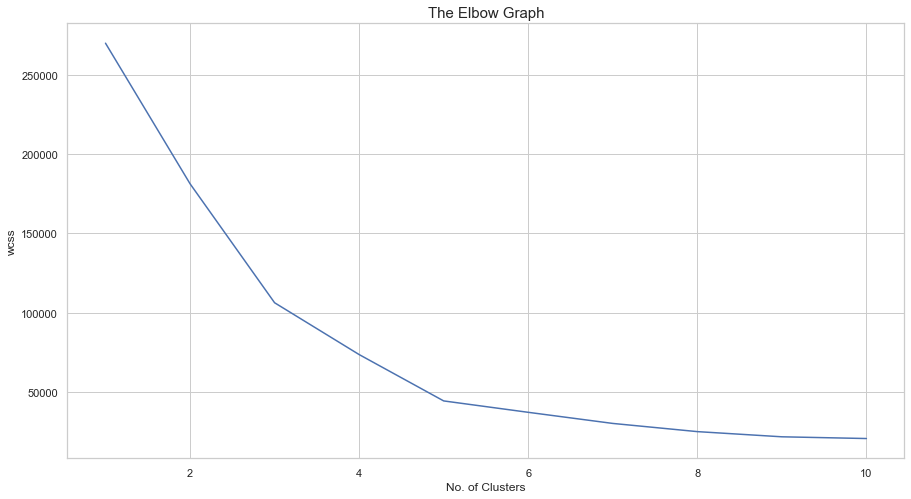

In [30]:
# plot an elbow graph
plt.figure(figsize=(15,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Graph', fontsize = 15)
plt.xlabel('No. of Clusters', fontsize = 12)
plt.ylabel('wcss', fontsize = 12)
plt.show()  

This elbow method show a low slope line after 5 number of cluster so we can take 5 as optimum number of cluster.

- #### Training the k-Means Clustering Model

In [32]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# return a label for each data point based on their cluster
y_means = kmeans.fit_predict(Income_Spend)
print(y_means)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


5 Clusters - 0, 1, 2, 3, 4

- #### Visualizing all the Clusters

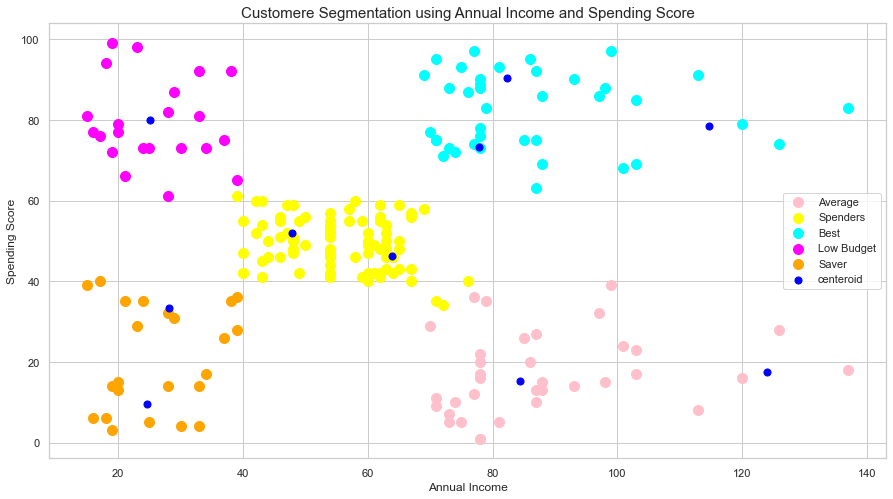

In [33]:
plt.figure(figsize=(15,8))
plt.scatter(Income_Spend[y_means == 0, 0], Income_Spend[y_means == 0, 1], s = 100, c = 'pink', label = 'Average')
plt.scatter(Income_Spend[y_means == 1, 0], Income_Spend[y_means == 1, 1], s = 100, c = 'yellow', label = 'Spenders')
plt.scatter(Income_Spend[y_means == 2, 0], Income_Spend[y_means == 2, 1], s = 100, c = 'cyan', label = 'Best')
plt.scatter(Income_Spend[y_means == 3, 0], Income_Spend[y_means == 3, 1], s = 100, c = 'magenta', label = 'Low Budget')
plt.scatter(Income_Spend[y_means == 4, 0], Income_Spend[y_means == 4, 1], s = 100, c = 'orange', label = 'Saver')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')
plt.legend()
plt.title('Customere Segmentation using Annual Income and Spending Score', fontsize = 15)
plt.xlabel('Annual Income', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.show()

Based on the above clustering we can clearly say that there are five cluster segments present based on customers' Annual Income and Spending Score. We named them as Low budget, Spenders, Average, Savers, and Best.

### Cluster based on Age and Spending Score

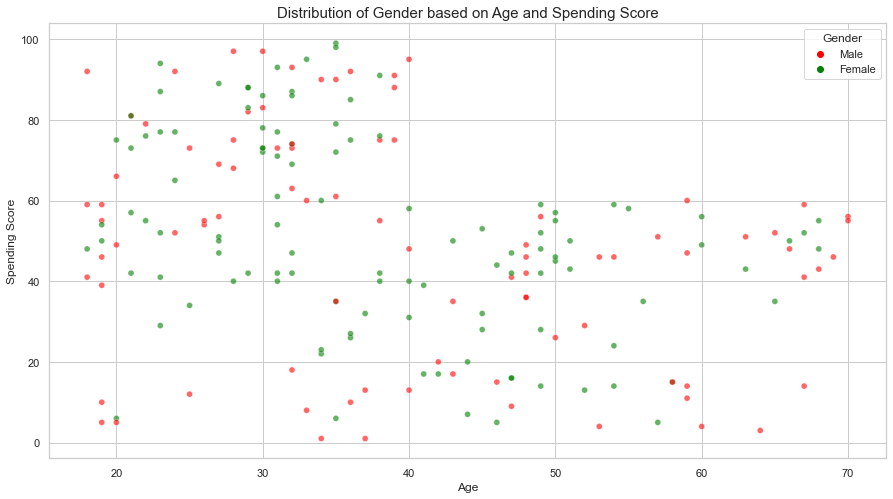

In [35]:
plt.figure(figsize=(15,8))
sns.scatterplot(customer_data['Age'], customer_data['Spending Score (1-100)'],hue=customer_data['Gender'],palette= ['red','green'] ,alpha=0.6)
plt.title('Distribution of Gender based on Age and Spending Score', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.show()

This scatter plot show the distribution of customers based on their age, spending score and gender. And we can clearly observe that aged people don't have higher spending score.

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


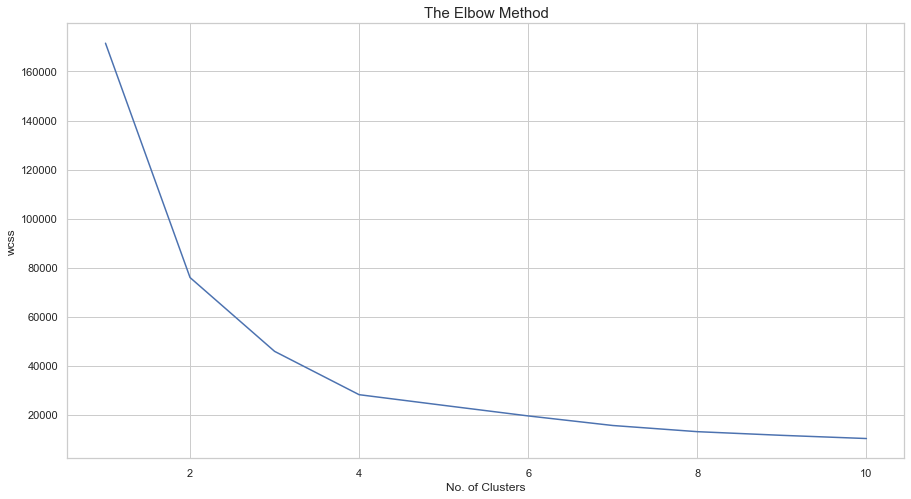

In [36]:
Age_Spend = customer_data[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(Age_Spend)
    wcss.append(km.inertia_)

plt.figure(figsize=(15,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 15)
plt.xlabel('No. of Clusters', fontsize = 12)
plt.ylabel('wcss', fontsize = 12)
plt.show()  

This elbow method show a low slope line after 4 noumber of cluster so we can take 4 as optimum number of cluster.

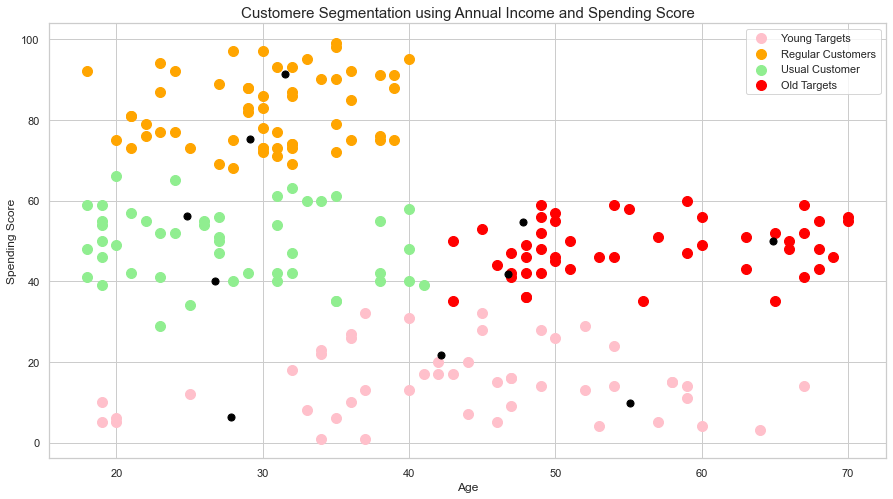

In [37]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(Age_Spend)

plt.figure(figsize=(15,8))
plt.scatter(Age_Spend[ymeans == 0, 0], Age_Spend[ymeans == 0, 1], s = 100, c = 'pink', label = 'Young Targets' )
plt.scatter(Age_Spend[ymeans == 1, 0], Age_Spend[ymeans == 1, 1], s = 100, c = 'orange', label = 'Regular Customers')
plt.scatter(Age_Spend[ymeans == 2, 0], Age_Spend[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Usual Customer')
plt.scatter(Age_Spend[ymeans == 3, 0], Age_Spend[ymeans == 3, 1], s = 100, c = 'red', label = 'Old Targets')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 50, c = 'black')
plt.legend()
plt.title('Customere Segmentation using Annual Income and Spending Score', fontsize = 15)
plt.xlabel('Age', fontsize = 12)
plt.ylabel('Spending Score', fontsize = 12)
plt.show()

Based on the above clustering we can clearly say that there are four cluster segments present based on customers' Age and Spending Score. We named them as Regular Customers, Usual Customer, Young Targets, and Old Targets.

##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------